In [2]:
import  h5py
import pandas as pd
import numpy as np
import STAGATE
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from automatic_peak_picking_2D import automatic_2D_peak_picking

In [3]:
os.environ['R_HOME'] = '/home/kxxiao/anaconda3/envs/sg/lib/R'
os.environ['R_USER'] = '/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/rpy2'

In [4]:
f =  h5py.File('../mutilcellar_datasets/2D_GBM.h5','r')
#MSI_train = f["Data"]

In [5]:
f.keys()

<KeysViewHDF5 ['Data', 'mzArray', 'xLocation', 'yLocation']>

In [6]:
data = f["Data"]  # spectral information.
all_mass = f["mzArray"]  
L_features = len(all_mass)
coordx = np.array(f["xLocation"]).astype(int)
coordy = np.array(f["yLocation"]).astype(int)

In [7]:
adata=sc.AnnData(pd.DataFrame(data).T)
adata.obsm['spatial']=np.array([coordx,coordy]).T
adata.var_names=np.array(all_mass).astype(str)

/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
adata

AnnData object with n_obs × n_vars = 3570 × 21241
    obsm: 'spatial'

In [ ]:

adata2=automatic_2D_peak_picking(adata,ol_mass=len(adata.var),num_marker=1300,cluster_method='mclust',r=1.7,
                                 k_class_first=4,k_class=6,alpha=0.5,pre_resolutation=0.12)



In [9]:
adata2.uns["mclust_colors"]=['#1f77b4', '#9467bd', '#d62728','#2ca02c','#ff7f0e', '#8c564b']

<AxesSubplot:title={'center':'SmartGate'}, xlabel='spatial1', ylabel='spatial2'>

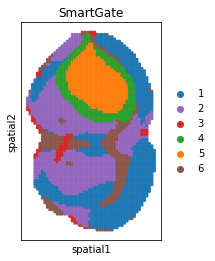

In [10]:
#sc.pp.neighbors(adata)
#plt.rcParams["figure.figsize"] = (2.5, 3.5)
#sc.tl.louvain(adata,resolution=0.22)
plt.rcParams["figure.figsize"] = (2.5, 4)
#sc.pl.embedding(adata, basis="spatial", color="louvain",s=56,show=False,title='STAGATE',cmap='Greys')
sc.pl.embedding(adata2, basis='spatial',color='mclust',show=False,title='SmartGate',s=44)

... storing 'mclust' as categorical


<AxesSubplot:title={'center':'mclust'}, xlabel='spatial1', ylabel='spatial2'>

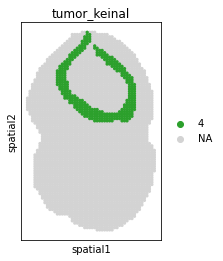

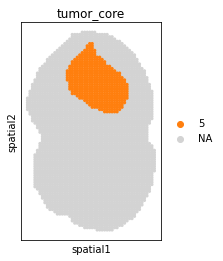

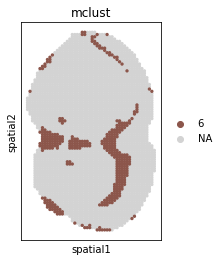

In [11]:
adata2.obs['mclust']=adata2.obs['mclust'].astype(str)
sc.pl.embedding(adata2, basis='spatial',color='mclust',show=False,title='tumor_keinal',s=44,groups=['4'])
sc.pl.embedding(adata2, basis='spatial',color='mclust',show=False,title='tumor_core',s=44,groups=['5'])
sc.pl.embedding(adata2, basis='spatial',color='mclust',show=False,s=44,groups=['6'])
#sc.pl.embedding(adata2, basis='spatial',color='mclust',show=False,title='Heart',s=44,groups=['3'])

# Show the top five marker genes in each cluster

In [ ]:
pd.DataFrame(adata2.uns['rank_genes_groups']['names']).head(5)

In [ ]:
adata_norm=adata2.copy()
norm_X=pd.DataFrame(adata_norm.X)
norm_X=(norm_X-np.min(norm_X))/(np.max(norm_X)-np.min(norm_X))
# _range = np.max(data) - np.min(data)
adata_norm.X=norm_X

In [ ]:
sc.pl.embedding(adata_norm, basis="spatial",color=adata2.uns['rank_genes_groups']['names'][0],s=50)

In [ ]:
marker_ion=pd.DataFrame(adata2.uns['rank_genes_groups']['names']).head(2)
marker_ion=np.array(marker_ion).reshape(-1,)

In [ ]:
sc.pl.heatmap(adata_norm,marker_ion,groupby='mclust',dendrogram=True,
              swap_axes=True,show = True,standard_scale='var',figsize=[10,7])

In [ ]:
marker1=np.array(pd.DataFrame(adata2.uns['rank_genes_groups']['names'])['4'].head(5))
marker2=np.array(pd.DataFrame(adata2.uns['rank_genes_groups']['names'])['5'].head(5))
marker_tumor=np.hstack((marker1,marker2))
sc.pl.stacked_violin(adata_norm,marker_tumor,groupby='mclust',figsize=[8,4],dendrogram=True)